# Creating an example of a circuit cost function

In [1]:
from qiskit.circuit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from random import randrange
from numpy import pi
from project.unified_noise_model.Unified_Noise_Model import Unified_Noise_Model

### First cost function

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['rz']
  All-qubits errors: ['rz']


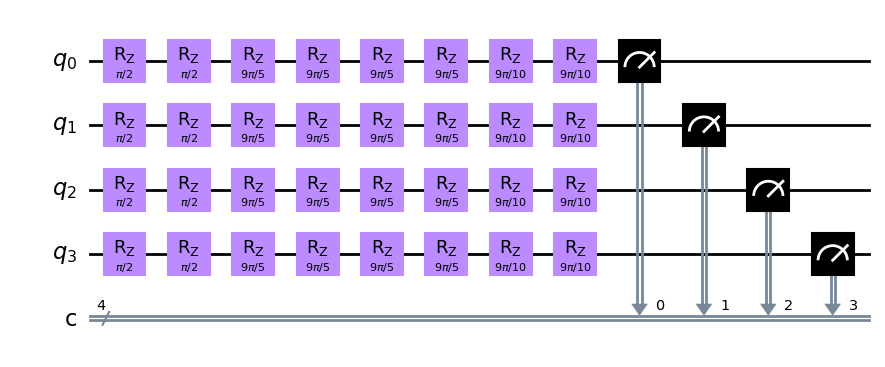

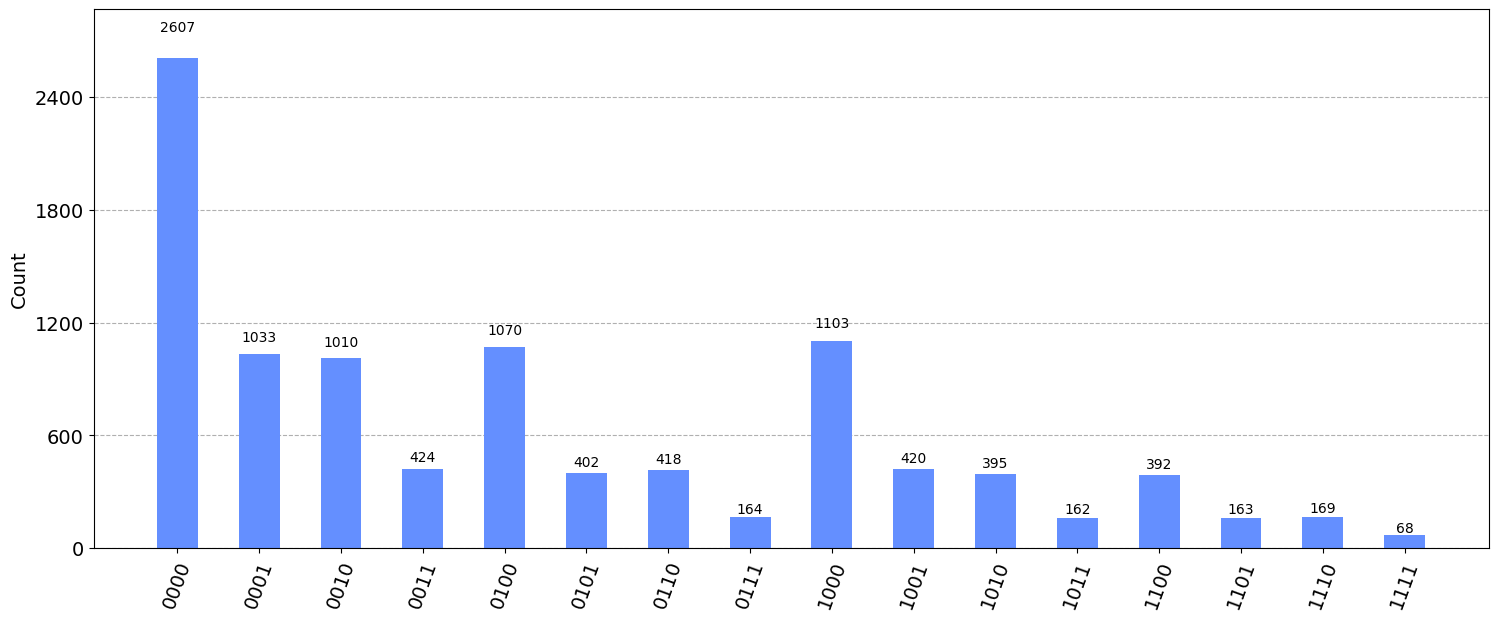

cost: 1.1364 



In [10]:
def cost_func(num_qubits,num_iterations,noise_model):
    qc = QuantumCircuit(num_qubits,num_qubits)
    shots=10000
    
    #Add random phi cz gates
    for itr in range(num_iterations):
        random_phi = randrange(0,20,step=1)
        random_phi = random_phi / 10
        for q in range(num_qubits):
            qc.rz(random_phi * pi,q)
            qc.rz(random_phi * pi,q)
            
    qc.measure(range(num_qubits),range(num_qubits))
    display(qc.draw('mpl'))
    
    #Run the circuit 10000 times and store the results
    simulator = AerSimulator(noise_model=noise_model)
    result = simulator.run(qc,shots=shots).result()
    counts = result.get_counts(0)
    display(plot_histogram(counts,figsize=[18,7]))

    #Calculate the average for result of each qubit, and finally sum each of the averages to get the COST.
    cost = 0
    for qubit in range(num_qubits):
        qubit_average = 0
        for string in counts.keys():
            current_qubit_in_current_string = string[qubit]
            if current_qubit_in_current_string == '1':
                qubit_average += counts[string]
        qubit_average = qubit_average / shots
        print('qubit ',qubit,' average:',qubit_average,'\n')
        cost += qubit_average
    return cost
                
unm = Unified_Noise_Model()
#noise model with 0.2 of depolarization prob
unm.add_depolarizing_channel(0.1,['rz'],[])
print(unm.noise_model)

#cost function with 5 qubits and 4 iterations
cost = cost_func(4,4,unm.noise_model) 
print('cost:',cost,'\n')


### Second cost function

Given a cost function with a fixed...
* amount of rz pairs iterations
* noise level
* amount of qubits

...find the rz rotations that minimize the cost. 

* First of all, do it just with depolarizing noise. 
* Second, try varying the depolarizing noise level and compare the minimized parameters.
* Finally, try it with the complete UNM model

In [51]:
costs = []
def cost_func2(rotations,num_qubits,num_iterations,noise_model):
    qc = QuantumCircuit(num_qubits,num_qubits)
    shots=10000
    
    #Add random phi cz gates
    for itr in range(num_iterations):
        for q in range(num_qubits):
            qc.rz(rotations[itr],q)
            qc.rz(rotations[itr],q)
            
    qc.measure(range(num_qubits),range(num_qubits))
    #display(qc.draw('mpl'))
    
    #Run the circuit 10000 times and store the results
    simulator = AerSimulator(noise_model=noise_model)
    result = simulator.run(qc,shots=shots).result()
    counts = result.get_counts(0)
    #display(plot_histogram(counts,figsize=[18,7]))

    #Calculate the average for result of each qubit, and finally sum each of the averages to get the COST.
    cost = 0
    for qubit in range(num_qubits):
        qubit_average = 0
        for string in counts.keys():
            current_qubit_in_current_string = string[qubit]
            if current_qubit_in_current_string == '1':
                qubit_average += counts[string]
        qubit_average = qubit_average / shots
        print('qubit ',qubit,' average:',qubit_average,'\n')
        cost += qubit_average
    cost = cost / num_qubits
    print('cost ',cost)
    print('---------------------------------------------')
    costs.append(cost)
    return cost

In [66]:
from scipy.optimize import minimize
costs = []

# setting up the fixed parameters
depol_noise_prob = 0.1
num_iterations = 4
num_qubits = 4

#noise model
unm = Unified_Noise_Model()
unm.add_depolarizing_channel(depol_noise_prob,['rz'],[])
print(unm.noise_model)

#cost function

#There are the multipl
angles = []
for i in range(num_iterations):
    random_phi = randrange(0,20,step=1)
    random_phi = random_phi / 10
    angles.append(random_phi * pi)

print('angles:', angles)

result = minimize(
fun=cost_func2,
x0=angles,
args=(num_qubits,num_iterations,unm.noise_model),
method='COBYLA',
)
print('result: ',result)
print('checking minimized parameters:')
cost_func2(result.x,num_qubits,num_iterations,unm.noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['rz']
  All-qubits errors: ['rz']
angles: [3.7699111843077517, 5.654866776461628, 5.340707511102648, 1.2566370614359172]
qubit  0  average: 0.2807 

qubit  1  average: 0.2828 

qubit  2  average: 0.2946 

qubit  3  average: 0.2811 

cost  0.2848
---------------------------------------------
qubit  0  average: 0.2867 

qubit  1  average: 0.2803 

qubit  2  average: 0.2908 

qubit  3  average: 0.2806 

cost  0.28459999999999996
---------------------------------------------
qubit  0  average: 0.28 

qubit  1  average: 0.2849 

qubit  2  average: 0.2783 

qubit  3  average: 0.285 

cost  0.28204999999999997
---------------------------------------------
qubit  0  average: 0.2838 

qubit  1  average: 0.2863 

qubit  2  average: 0.2898 

qubit  3  average: 0.2862 

cost  0.28652500000000003
---------------------------------------------
qubit  0  average: 0.2879 

qubit  1  average: 0.2916 

qubit  2  average: 0.28

0.287375

[0.2848, 0.28459999999999996, 0.28204999999999997, 0.28652500000000003, 0.2874, 0.282725, 0.283425, 0.284825, 0.27990000000000004, 0.278725, 0.285975, 0.285475, 0.28645, 0.287825, 0.28037500000000004, 0.284525, 0.2874, 0.2857, 0.2848, 0.285475, 0.285475, 0.287675, 0.2831, 0.283625, 0.286725, 0.28809999999999997, 0.28290000000000004, 0.29000000000000004, 0.282925, 0.28342500000000004, 0.287725, 0.283825, 0.282925, 0.285025, 0.285475, 0.27985, 0.28855, 0.28635, 0.28035, 0.2879, 0.2829, 0.28297500000000003, 0.2871, 0.287375]


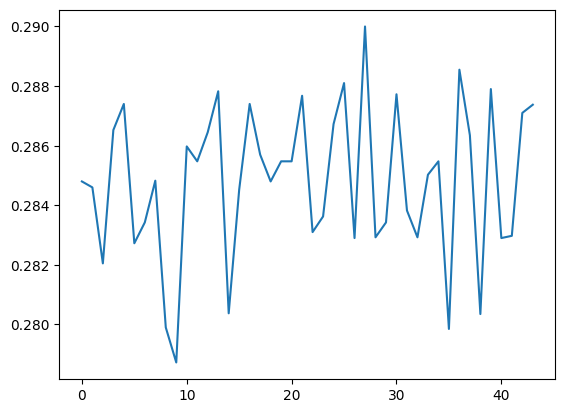

In [67]:
import matplotlib.pyplot as plt

print(costs)
plt.plot(range(len(costs)),costs, label='Cost Function')
